In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import cartopy.feature as cfeature

In [2]:
def get_section(border=None):
        dim_subset={'south0': 'lon','south': 'lon',
                         'north0': 'lon','north': 'lon',
                         'east0' : 'lat', 'east' : 'lat',
                        'equator' : 'lon',
                        'Amazon':'lon',
                        'LaPlata' : 'lon',
                        'sSEC': 'lat',
                        'BC1': 'lon',
                        'BC2': 'lon',
                        'BC3': 'lon',
                        'BC4': 'lon',
                        'MC' : 'lon' } 

        fnt_subset={'south': [dict(lat=-55), (-69,-9)],
                         'north': [dict(lat=5), (-69,-9)],
                         'east' : [dict(lon=-9), (-55,5)],
                        'equator' : [dict(lat=-0), (-60,-9)],
                        'Amazon' : [dict(lat=1), (-57,-30)],
                        'LaPlata' : [dict(lat=-35.5), (-60,-30)],
                        'sSEC': [dict(lon=-23), (-35,-5)],
                        'BC1': [dict(lat=-22), (-42,-9)],
                        'BC2':[dict(lat=-24), (-45,-15)],
                        'BC3':[dict(lat=-25), (-48,-15)],
                        'BC4':[dict(lat=-28), (-50,-15)],
                        'MC':[dict(lat=-42), (-66,-25)]
                        }
        keys=fnt_subset.keys()
        if border is None:
                return keys
        else:
                return dim_subset[border], fnt_subset[border]

In [3]:
topo=xr.open_dataset('~/SWA14/gridgen/bathy_edited/ocean_topog.nc')
dgrid=xr.open_dataset("~/SWA14/gridgen/bathy_edited/ocean_hgrid.nc")


x=dgrid.x[0,1::2]
y=dgrid.y[1::2,0]

z = topo
z['lon'] = x
z['lat'] = y
z=z.set_coords(["lon", "lat"]).rename(nyp='lat',nxp='lon')
print(z)

<xarray.Dataset>
Dimensions:  (ny: 857, nx: 857, lon: 857, lat: 857)
Coordinates:
  * lon      (lon) float64 -68.96 -68.89 -68.82 -68.75 ... -9.175 -9.105 -9.035
  * lat      (lat) float64 -54.96 -54.89 -54.82 -54.75 ... 4.825 4.895 4.965
Dimensions without coordinates: ny, nx
Data variables:
    depth    (ny, nx) float64 ...
Attributes:
    grid_version:  0.2
    code_version:  ESMG/gridtools: ['heads/main-0-ge164146811-dirty', '']
    history:       2023-05-24: gridtools.grid.mom6.convert_ROMS_to_MOM6 + kwargs


# Plot Domain

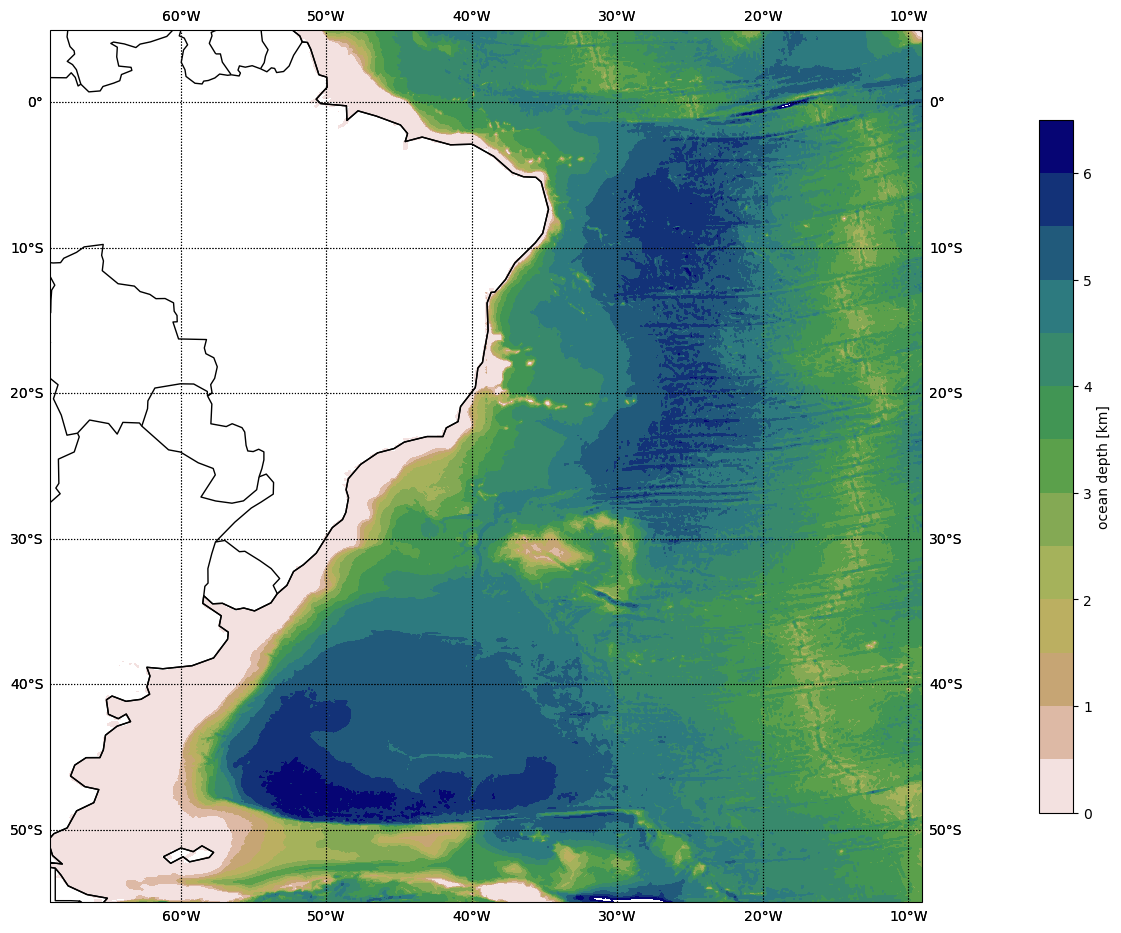

In [9]:
proj=ccrs.PlateCarree() #opcional

fig = plt.figure(figsize=(15,15),facecolor=None) 
ax1 = plt.axes(projection=proj) 
#a=plt.contourf(x,y,topo.depth, size=10, cmap= 'gist_earth_r', levels=np.arange(5,6500,145))
a=plt.contourf(x,y,topo.depth/1000, size=10, cmap= 'gist_earth_r', levels=np.arange(0,7,.50))
#plt.contour(topo.depth,colors='k',levels=np.arange(5000,8000,1000))

       
gl = ax1.gridlines(crs=proj,color="black", linestyle="dotted",draw_labels=True)  

"""ax1.add_patch(mpatches.Rectangle(xy=[-60, -40], width=40, height=20,
                                    facecolor='grey', edgecolor='black', 
                                    linewidth=2,
                                    alpha=0.4,
                                    transform=proj))
                
ax1.add_patch(mpatches.Rectangle(xy=[-70, -55], width=60, height=55,
                                    facecolor='none', edgecolor='red', 
                                    linewidth=2,
                                    alpha=0.9,
                                    transform=proj))
"""
gl = ax1.gridlines(crs=proj,color="black", linestyle="dotted",draw_labels=True)  



# Add geopolitical boundaries for map reference
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
ax1.add_feature(cfeature.BORDERS.with_scale('110m'))


plt.colorbar(a,ax=ax1,shrink=.60,orientation="vertical", pad=0.1,label="ocean depth [km]") #opcional
# Set some titles
#plt.title('Oceanic Domains', loc='left', size=16,fontweight="bold")

plt.savefig("test.png", bbox_inches='tight')

# Plot transects

south {'lat': -55} (-69, -9)
north {'lat': 5} (-69, -9)
east {'lon': -9} (-55, 5)
equator {'lat': 0} (-60, 0)
Amazon {'lat': 1} (-57, -30)
LaPlata {'lat': -35.5} (-60, -30)
sSEC {'lon': -23} (-35, -5)
BC1 {'lat': -22} (-42, -5)
BC2 {'lat': -24} (-45, -15)
BC3 {'lat': -25} (-48, -15)
BC4 {'lat': -28} (-50, -15)
MC {'lat': -42} (-66, -25)


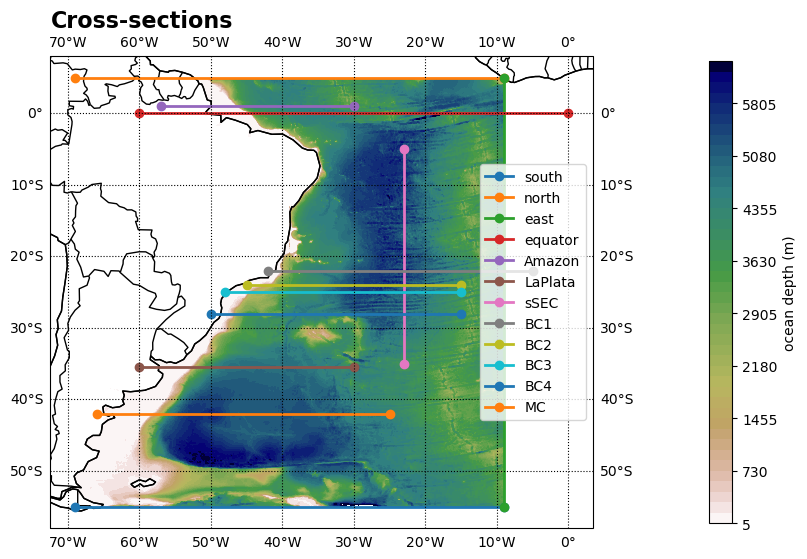

In [89]:
proj=ccrs.PlateCarree() #opcional

fig = plt.figure(figsize=(10,10),facecolor=None) 
ax1 = plt.axes(projection=proj) 
a=plt.contourf(x,y,topo.depth, size=10, cmap= 'gist_earth_r', levels=np.arange(5,6500,145))
#plt.contour(topo.depth,colors='k',levels=np.arange(5000,8000,1000))

for b in get_section():
    print(b,get_section(b)[1][0],get_section(b)[1][1])
    if get_section(b)[0] == 'lat':
        crosslon=np.full(2,get_section(b)[1][0]['lon'])
        crosslat=get_section(b)[1][1]
    else:
        crosslat=np.full(2,get_section(b)[1][0]['lat'])
        crosslon=get_section(b)[1][1]
    plt.plot(crosslon,crosslat,linewidth=2,linestyle='-',marker='o',label=b)
    plt.legend()        
gl = ax1.gridlines(crs=proj,color="black", linestyle="dotted",draw_labels=True)  



# Add geopolitical boundaries for map reference
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
ax1.add_feature(cfeature.BORDERS.with_scale('110m'))


plt.colorbar(a,ax=ax1,shrink=.60,orientation="vertical", pad=0.15,label="ocean depth (m)") #opcional
# Set some titles
plt.title('Cross-sections', loc='left', size=16,fontweight="bold")

plt.savefig("transects.png", bbox_inches='tight')

south {'lat': -55} (-69, -9)
north {'lat': 5} (-69, -9)
east {'lon': -9} (-55, 5)
equator {'lat': 0} (-60, -9)
Amazon {'lat': 1} (-57, -30)
LaPlata {'lat': -35.5} (-60, -30)
sSEC {'lon': -23} (-35, -5)
BC1 {'lat': -22} (-42, -9)
BC2 {'lat': -24} (-45, -15)
BC3 {'lat': -25} (-48, -15)
BC4 {'lat': -28} (-50, -15)
MC {'lat': -42} (-66, -25)


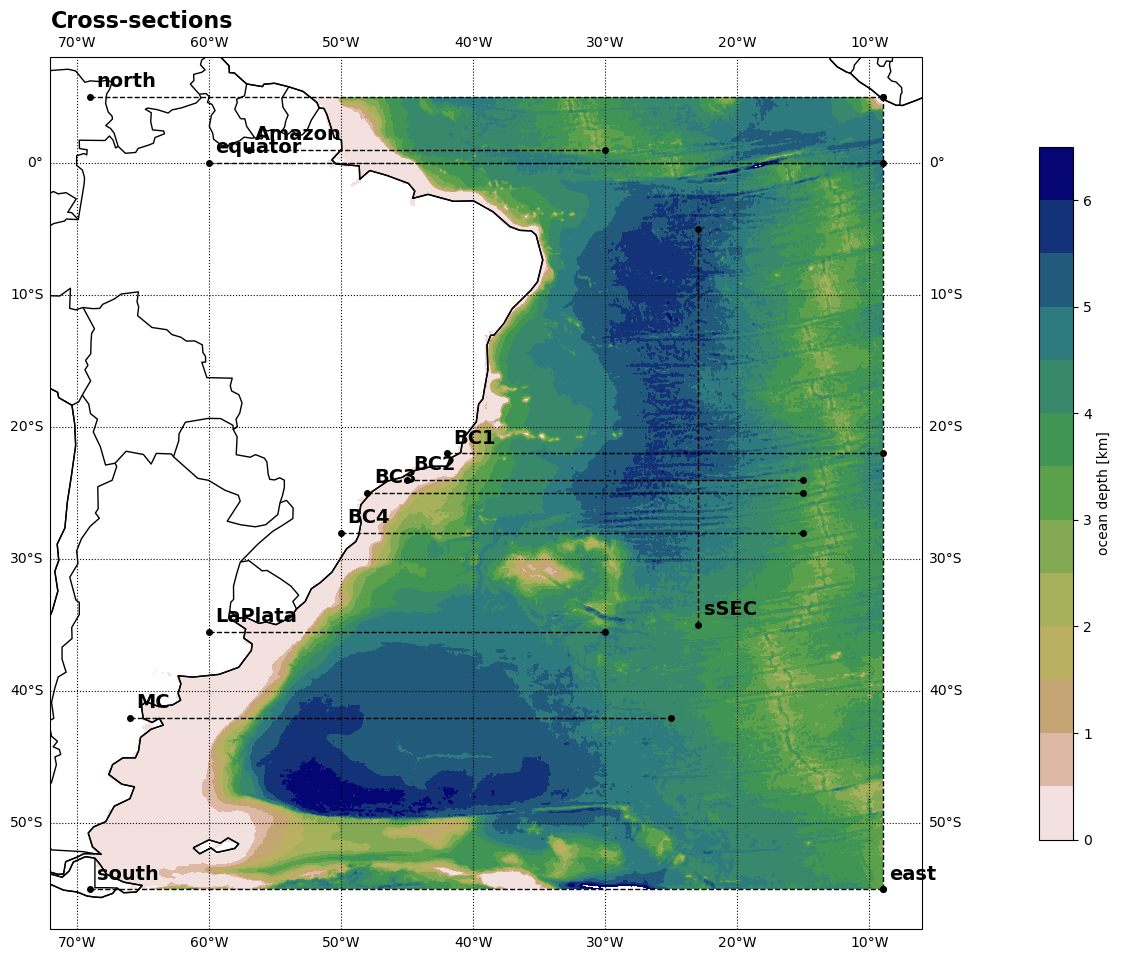

In [121]:
proj=ccrs.PlateCarree() #opcional

fig = plt.figure(figsize=(15,15),facecolor=None) 
ax1 = plt.axes(projection=proj) 
a=plt.contourf(x,y,topo.depth/1000, size=10, cmap= 'gist_earth_r', levels=np.arange(0,7,.50))
#plt.contour(topo.depth,colors='k',levels=np.arange(5000,8000,1000))

for b in get_section():
    print(b,get_section(b)[1][0],get_section(b)[1][1])
    if get_section(b)[0] == 'lat':
        crosslon=np.full(2,get_section(b)[1][0]['lon'])
        crosslat=get_section(b)[1][1]
    else:
        crosslat=np.full(2,get_section(b)[1][0]['lat'])
        crosslon=get_section(b)[1][1]
    plt.plot(crosslon,crosslat,linewidth=1,linestyle='--',marker='o',color='k',markersize=4)
    plt.text(np.min(crosslon)+.5,np.min(crosslat)+.75,b, fontweight="bold", size=14)
    #plt.legend()        
gl = ax1.gridlines(crs=proj,color="black", linestyle="dotted",draw_labels=True)  



# Add geopolitical boundaries for map reference
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE.with_scale('110m'))
ax1.add_feature(cfeature.BORDERS.with_scale('110m'))


plt.colorbar(a,ax=ax1,shrink=.60,orientation="vertical", pad=0.1,label="ocean depth [km]") #opcional


# Set title
plt.title('Cross-sections', loc='left', size=16, fontweight="bold")
plt.savefig("transects_pb.png", bbox_inches='tight')